In [1]:
"""@author Okorie Ndubuisi March 2025"""
import numpy as np
import matplotlib.pyplot as plt
from logisticregression import LogisticRegression
import seaborn as sns
import pandas as pd
sns.set_theme()

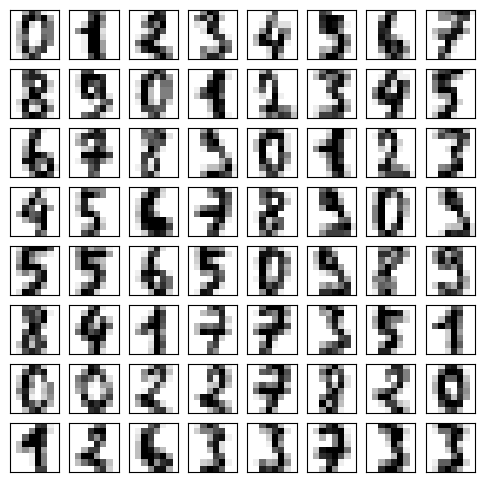

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [3]:
X = np.array(digits.data[:200, :], dtype=np.float64)
Y = digits.target[:200]

X_test = digits.data[200:, :]
Y_true = digits.target[200:]

In [4]:
X.shape

(200, 64)

In [5]:
Y.shape

(200,)

In [6]:
model = LogisticRegression()

In [ ]:
K = 10
W = np.zeros(shape=(X.shape[1], K))
b = np.zeros(shape=(1, K))
lambda_ = 1
num_iters = 100000
decimals = 8

In [8]:
d = model.fit(X, Y, W, b, learning_rate=1e-8, optimizer='adam', num_iters=num_iters, epochs=1, lambda_=lambda_)
W = d['W']
b = d['b']
costs = d['costs']
W_history = d['W_history']
b_history = d['W_history']
iterations = d['iterations']

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 3.80043977   
Iteration 10000: Cost 3.79062895   
Iteration 20000: Cost 3.77823454   
Iteration 30000: Cost 3.76466065   
Iteration 40000: Cost 3.75088473   
Iteration 50000: Cost 3.73722050   
Iteration 60000: Cost 3.72380088   
Iteration 70000: Cost 3.71058934   
Iteration 80000: Cost 3.69759323   
Iteration 90000: Cost 3.68490298   
Iteration 99999: Cost 3.67254075   


In [9]:
W[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.07016299e-03, -2.06707284e-03, -1.78473155e-03,
         2.01043817e-03, -1.37119767e-03,  2.00954523e-03,
        -2.01026055e-03, -2.08672301e-03, -1.80372584e-03,
        -1.93660791e-03],
       [-1.28153607e-03, -2.06794618e-03, -3.22155178e-04,
         2.00229015e-03, -2.05031823e-03,  2.00359547e-03,
        -1.90629798e-03, -1.08388174e-03, -8.92356869e-04,
         1.17067387e-03],
       [ 1.89406677e-03, -1.87544719e-03, -1.11636556e-03,
         1.99566081e-03, -1.53786645e-03,  1.94995763e-03,
         1.53211353e-03,  1.97254144e-03, -9.26374096e-04,
         1.97166276e-03],
       [-7.34575570e-04, -1.34438742e-04, -1.20789031e-03,
         1.98990997e-03,  1.97306893e-03,  2.92317571e-05,
        -4.29154992e-04,  1.26991004e-03, -7.61111356e-05,
        -1.

In [10]:
b

array([[-6.82437418e-04,  1.95803605e-03,  1.96186516e-03,
         1.96304165e-03,  1.91603506e-03,  1.93057194e-03,
         3.75259629e-04,  8.35604563e-06, -1.03108312e-03,
         7.59880694e-04]])

In [11]:
print(W.shape)
print(b.shape)

(64, 10)
(1, 10)


In [12]:
X_test.shape

(1597, 64)

In [13]:
test_predictions = model.predict(X_test, W, b)

In [14]:
print(test_predictions.shape)

(1597,)


In [15]:
test_accuracy = (len(Y_true[np.where(Y_true == test_predictions)]) / len(Y_true)) * 100
test_accuracy

72.94927989981215

In [16]:
train_predictions = model.predict(X, W, b)

In [17]:
train_accuracy = (len(Y[np.where(Y == train_predictions)]) / len(Y)) * 100
train_accuracy

97.0

In [18]:
best_weights, best_bias, lowest_cost = model.get_best_params()

In [19]:
lowest_cost

3.6725407483126467

In [20]:
best_bias

array([[-6.82437418e-04,  1.95803605e-03,  1.96186516e-03,
         1.96304165e-03,  1.91603506e-03,  1.93057194e-03,
         3.75259629e-04,  8.35604563e-06, -1.03108312e-03,
         7.59880694e-04]])

In [21]:
best_weights

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.07016299e-03, -2.06707284e-03, -1.78473155e-03,
         2.01043817e-03, -1.37119767e-03,  2.00954523e-03,
        -2.01026055e-03, -2.08672301e-03, -1.80372584e-03,
        -1.93660791e-03],
       [-1.28153607e-03, -2.06794618e-03, -3.22155178e-04,
         2.00229015e-03, -2.05031823e-03,  2.00359547e-03,
        -1.90629798e-03, -1.08388174e-03, -8.92356869e-04,
         1.17067387e-03],
       [ 1.89406677e-03, -1.87544719e-03, -1.11636556e-03,
         1.99566081e-03, -1.53786645e-03,  1.94995763e-03,
         1.53211353e-03,  1.97254144e-03, -9.26374096e-04,
         1.97166276e-03],
       [-7.34575570e-04, -1.34438742e-04, -1.20789031e-03,
         1.98990997e-03,  1.97306893e-03,  2.92317571e-05,
        -4.29154992e-04,  1.26991004e-03, -7.61111356e-05,
        -1.